In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
import numpy as np

from networkx.drawing.nx_agraph import graphviz_layout

# %pylab inline

# Test NetworkX Library

/home/jhaas/Python_Envs36/default/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: r is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


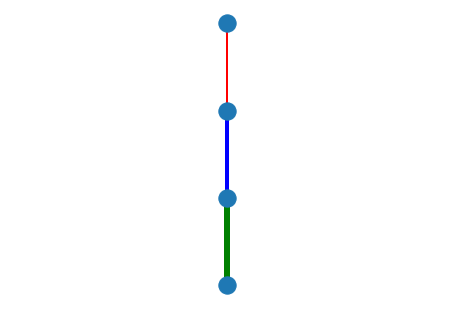

In [2]:
G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

In [2]:
#https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [5]:

G = nx.DiGraph()

G.add_node("ROOT")

for i in range(10):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i, color='r', weight=2)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i, color='b', weight=4)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i, color='g', weight=6)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
# write_dot(G,'test.dot')

# same layout using matplotlib with no labels
# plt.title('draw_networkx')
# pos =graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=False, arrows=True)
# plt.savefig('nx_test.png')

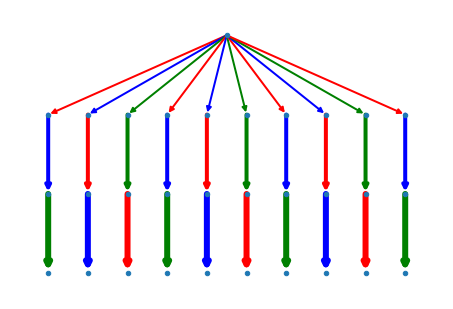

In [6]:
pos = hierarchy_pos(G,"ROOT")  

edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights, node_size=20)
# nx.draw(G, pos=pos, with_labels=False)

# Load Conductance Measures

In [3]:
val_attrib_conv1 = np.load('./zf_net_conductance/val_attri_conv1_.npy')
val_attrib_conv2 = np.load('./zf_net_conductance/val_attri_conv2_.npy')
val_attrib_conv3 = np.load('./zf_net_conductance/val_attri_conv3_.npy')
val_attrib_conv4 = np.load('./zf_net_conductance/val_attri_conv4_.npy')

val_labels_conv1 = np.load('./zf_net_conductance/val_labels_conv1_.npy')
val_labels_conv2 = np.load('./zf_net_conductance/val_labels_conv2_.npy')
val_labels_conv3 = np.load('./zf_net_conductance/val_labels_conv3_.npy')
val_labels_conv4 = np.load('./zf_net_conductance/val_labels_conv4_.npy')

In [4]:
# average attrib measures over images
    
conv1_frogs = np.mean(val_attrib_conv1[val_labels_conv1==0], axis=0)
conv2_frogs = np.mean(val_attrib_conv2[val_labels_conv2==0], axis=0)
conv3_frogs = np.mean(val_attrib_conv3[val_labels_conv3==0], axis=0)
conv4_frogs = np.mean(val_attrib_conv4[val_labels_conv4==0], axis=0)

conv1_horse = np.mean(val_attrib_conv1[val_labels_conv1==1], axis=0)
conv2_horse = np.mean(val_attrib_conv2[val_labels_conv2==1], axis=0)
conv3_horse = np.mean(val_attrib_conv3[val_labels_conv3==1], axis=0)
conv4_horse = np.mean(val_attrib_conv4[val_labels_conv4==1], axis=0)

# Plot Attribution Paths

In [81]:
G = nx.DiGraph()

G.add_node("ROOT")

for i, l1_e in enumerate(conv1_frogs[:10]):
    i_ = str(i) + "l1"
    G.add_node(i_)
    G.add_edge("ROOT", i_, weight=0.01)
    
    for j, l2_e in enumerate(conv2_frogs[:10]):
        
        j_ = str(j) + "l2"
        path_mag = np.sum((l1_e,l2_e))

        if (i==0):
            G.add_node(j_)
            
        G.add_edge(i_, j_, weight=path_mag*1000)
                                   
        for k, l3_e in enumerate(conv3_frogs[:50]):
        
            k_ = str(k) + "l3"
            path_mag = np.sum((l1_e, l2_e, l3_e))

            if (j==0):
                G.add_node(k_)
            
            G.add_edge(j_, k_, weight=path_mag*1000)
        
            for l, l4_e in enumerate(conv4_frogs[:20]):

                l_ = str(l) + "l4"
                path_mag = np.sum((l1_e, l2_e, l3_e, l4_e))

                if (k==0):
                    G.add_node(l_)

                G.add_edge(k_, l_, weight=path_mag*1000)
            

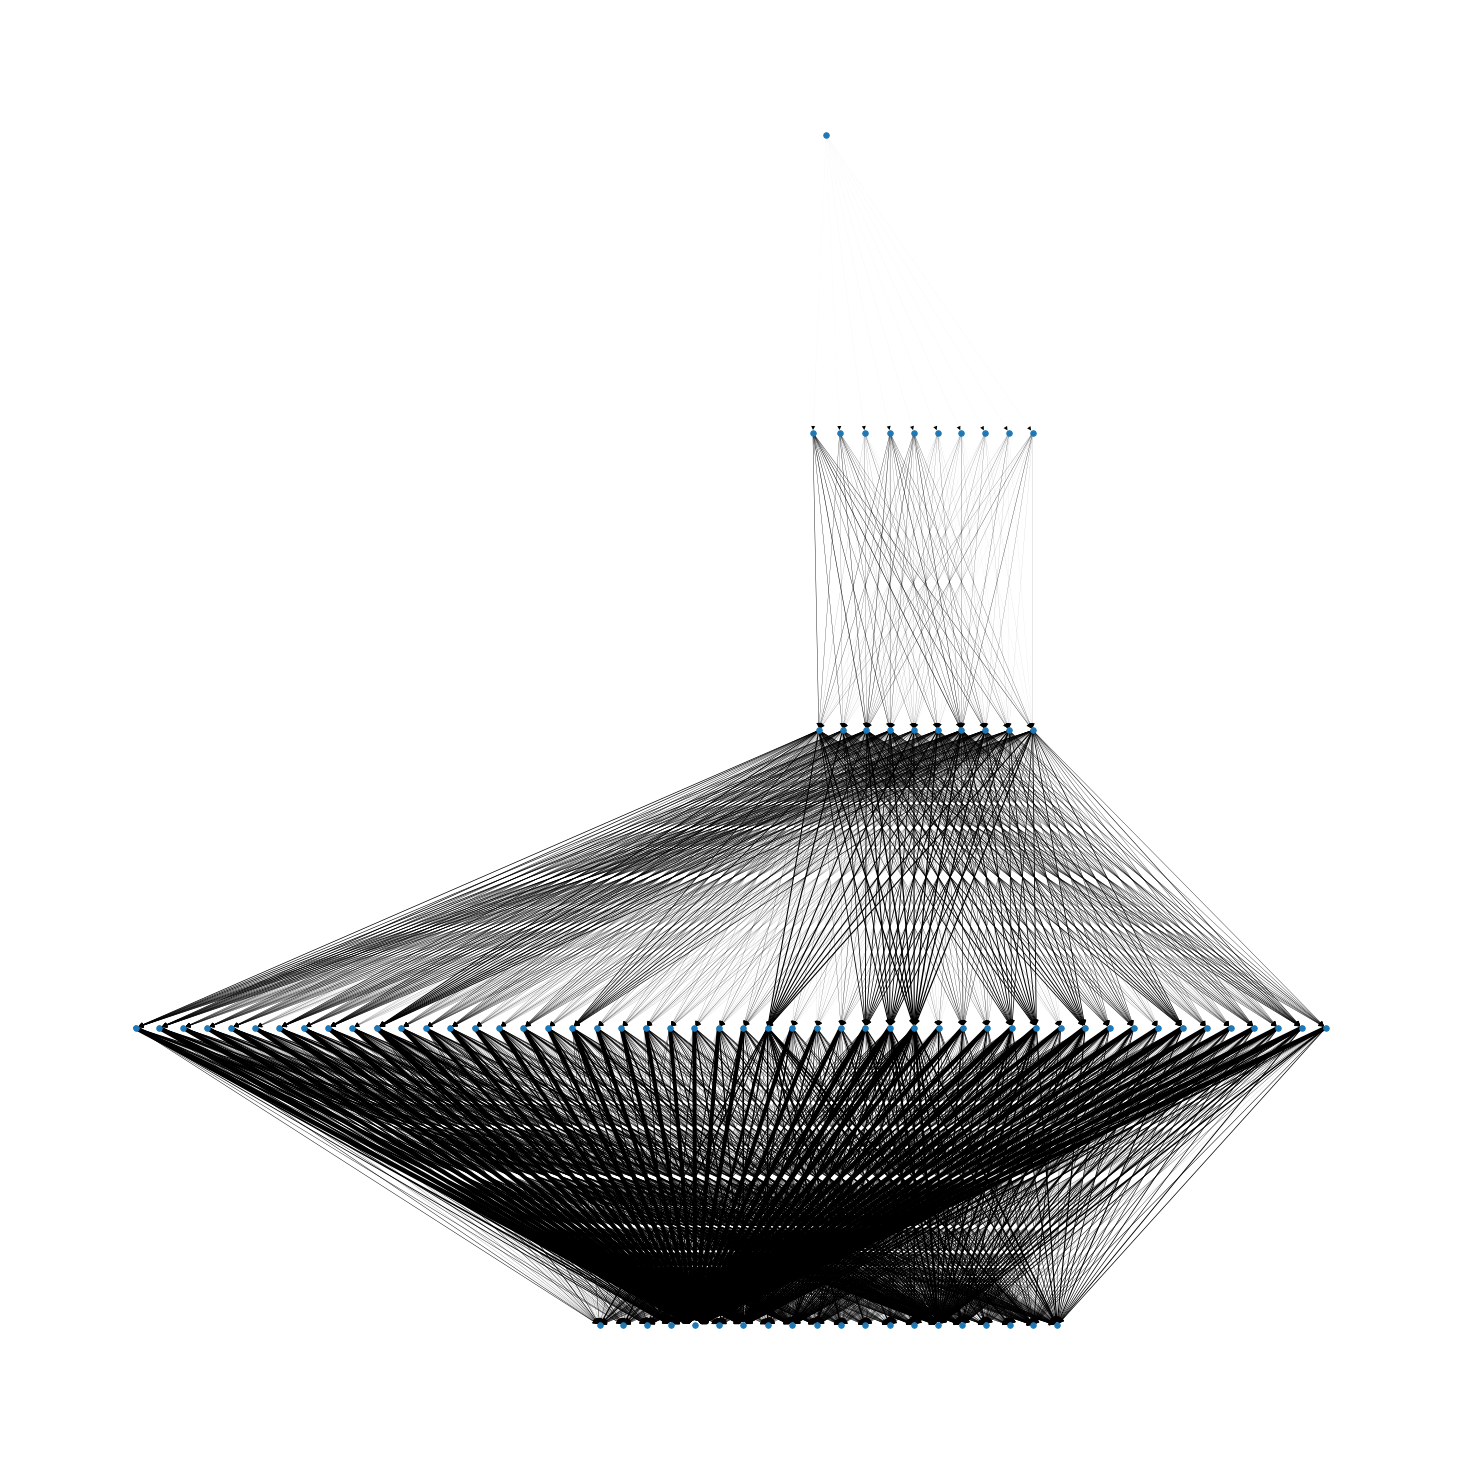

In [82]:
edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(20,20))


pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, edges=edges, width=weights, with_labels=False, arrows=True, node_size=30)